<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Men_and_Women_Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Men/Women Classification: a JPG dataset for male/female classification

https://www.kaggle.com/datasets/playlist/men-women-classification

In [1]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [2]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [5]:
!kaggle datasets download -d playlist/men-women-classification

100% 1.18G/1.19G [00:14<00:00, 142MB/s]
100% 1.19G/1.19G [00:14<00:00, 85.5MB/s]


In [8]:
!unzip men-women-classification -d men-women-classification


Streaming output truncated to the last 5000 lines.
  inflating: men-women-classification/data/women/00000260.jpg  
  inflating: men-women-classification/data/women/00000261.jpg  
  inflating: men-women-classification/data/women/00000262.jpg  
  inflating: men-women-classification/data/women/00000263.jpg  
  inflating: men-women-classification/data/women/00000264.jpg  
  inflating: men-women-classification/data/women/00000265.jpg  
  inflating: men-women-classification/data/women/00000266.jpg  
  inflating: men-women-classification/data/women/00000267.jpg  
  inflating: men-women-classification/data/women/00000268.jpg  
  inflating: men-women-classification/data/women/00000269.jpg  
  inflating: men-women-classification/data/women/00000270.jpg  
  inflating: men-women-classification/data/women/00000271.jpg  
  inflating: men-women-classification/data/women/00000272.jpg  
  inflating: men-women-classification/data/women/00000273.jpg  
  inflating: men-women-classification/data/women/0000

In [9]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the Men/Women Classification Dataset image folders (Male and Female)
men_folder = '/content/men-women-classification/men'
women_folder = '/content/men-women-classification/women'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process Men and Women Classification Dataset images (Men)
for filename in os.listdir(men_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(men_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents Men
# We Load and pre-process Men and Women Classification Dataset images (Women)
for filename in os.listdir(women_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(women_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents Women
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [10]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')])  # 2 classes: Men and Women

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
75/75 [==============================] - 65s 847ms/step - loss: 50.3394 - accuracy: 0.5445 - val_loss: 0.7080 - val_accuracy: 0.5593
Epoch 2/30
75/75 [==============================] - 67s 863ms/step - loss: 0.5969 - accuracy: 0.6772 - val_loss: 0.7790 - val_accuracy: 0.5543
Epoch 3/30
75/75 [==============================] - 60s 805ms/step - loss: 0.4834 - accuracy: 0.7612 - val_loss: 0.8812 - val_accuracy: 0.5593
Epoch 4/30
75/75 [==============================] - 57s 769ms/step - loss: 0.3631 - accuracy: 0.8384 - val_loss: 0.9972 - val_accuracy: 0.5576
Epoch 5/30
75/75 [==============================] - 57s 767ms/step - loss: 0.2344 - accuracy: 0.9044 - val_loss: 1.4377 - val_accuracy: 0.5893
Epoch 6/30
75/75 [==============================] - 59s 785ms/step - loss: 0.1608 - accuracy: 0.9432 - val_loss: 1.4249 - val_accuracy: 0.5776
Epoch 7/30
75/75 [==============================] - 59s 783ms/step - loss: 0.1298 - accuracy: 0.9612 - val_loss: 1.7539 - val_accuracy: 0.591

In [ ]:
# This section of code is to perform a cross validation on the model

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold

# Assuming you have loaded and pre-processed data (x_train, y_train)

# Number of folds for cross-validation
num_folds = 2

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the training and validation accuracies
train_accuracies = []
val_accuracies = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(x_train, y_train)):
    # Split the data into training and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Definition of the model
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='softmax')  # 2 classes Painting and Photos
    ])

    # Compilation of the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training of the model
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    # Evaluate and store training and validation accuracy for this fold
    _, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
    _, val_accuracy = model.evaluate(x_val_fold, y_val_fold)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Print the average training and validation accuracies across folds
print(f"\nAverage Training Accuracy: {sum(train_accuracies) / num_folds:.4f}")
print(f"Average Validation Accuracy: {sum(val_accuracies) / num_folds:.4f}")

In [23]:
#1 Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)
# Here we interpret the label using our dataset's class labels (0 Men and 1 Women)
class_labels = ['men', 'women']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 24ms/step
Predicted class: women


In [24]:
#2 Interpret the label using class labels (e.g., 0 for Men and 1 for Women)
class_labels = ['Men', 'Women']
predicted_class = class_labels[predicted_label]

print(f'Predicted class: {predicted_class}')


Predicted class: Women


In [25]:
#3 Predicting on a single image
sample_image = x_test[3]  # Replace with your image data

# Make predictions for the sample image
predictions = model.predict(np.expand_dims(sample_image, axis=0))

# Get the predicted label by finding the index with the highest probability
predicted_label = np.argmax(predictions)

# Interpret the predicted label using class labels (e.g., 0 for Men and 1 for Women)
class_labels = ['Men', 'Women']
predicted_class = class_labels[predicted_label]

# Display the predicted class
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 26ms/step
Predicted class: Women


In [16]:
# we test the model with a new photo from the internet.
# we know already that this new image is a Men image.
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/men-women-classification/men/00000002.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array
new_image_array = np.array(new_image)

# Normalize the image pixel values (if needed)
new_image_array = new_image_array / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['men', 'women']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 79ms/step
Predicted class: women


Below is another code that does the same as whats up

In [26]:
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/men-women-classification/men/00000002.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array and normalize pixel values if needed
new_image_array = np.array(new_image) / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['men', 'women']
predicted_class = class_labels[predicted_label]

# Display the prediction
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()


1/1 [==============================] - 0s 27ms/step
Predicted class: women


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

19/19 [==============================] - 4s 186ms/step


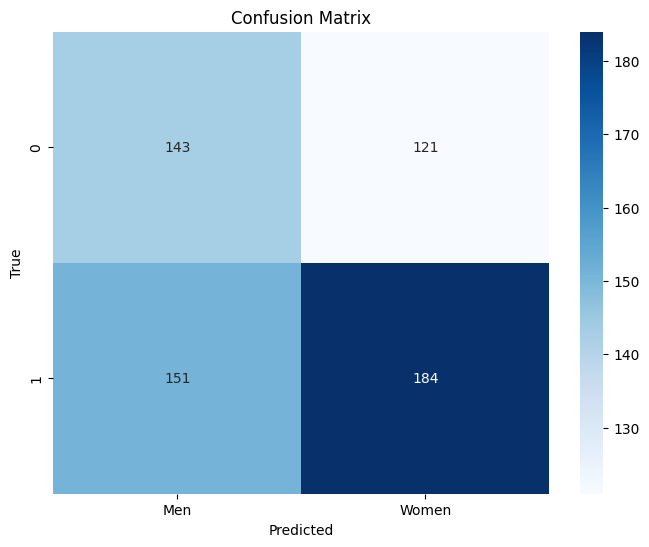

              precision    recall  f1-score   support

         Men       0.49      0.54      0.51       264
       Women       0.60      0.55      0.58       335

    accuracy                           0.55       599
   macro avg       0.54      0.55      0.54       599
weighted avg       0.55      0.55      0.55       599



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' are the model's predicted labels for the test set
# 'y_test' contains the true labels of the test set

# Convert one-hot encoded predictions to class labels
predicted_labels = model.predict(x_test)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Men', 'Women'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, target_names=['Men', 'Women'])
print(class_report)